In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df=pd.read_csv('1_boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [4]:
df.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
MEDV        22.532806
dtype: float64

In [5]:
df.fillna(df.mean(), inplace=True)

In [6]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=MinMaxScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.fit_transform(x_test)
print("Shape of scaled x_train: ",x_train_scaled.shape)
print("Shape of scaled x_test: ",x_test_scaled.shape)

Shape of scaled x_train:  (354, 13)
Shape of scaled x_test:  (152, 13)


In [9]:
x_train_scaled[0]

array([1.84000520e-04, 5.50000000e-01, 1.21700880e-01, 0.00000000e+00,
       2.03703704e-01, 6.00689787e-01, 5.36170213e-01, 4.18527039e-01,
       1.73913043e-01, 3.49236641e-01, 5.31914894e-01, 1.00000000e+00,
       1.54609929e-01])

In [10]:
x_train_scaled[3]

array([0.00195926, 0.        , 1.        , 0.        , 0.46090535,
       0.35504886, 0.98191489, 0.05690695, 0.13043478, 1.        ,
       0.79787234, 0.86673559, 0.63092199])

In [12]:
x_train_scaled[0].shape

(13,)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

def house_price_prediction():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(x_train_scaled[3].shape)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [19]:
model=house_price_prediction()
history=model.fit(x=x_train_scaled, y=y_train, batch_size=1, verbose=1, epochs=100, validation_data=(x_test_scaled, y_test))


Epoch 1/100


354/354 [==============================] - 3s 3ms/step - loss: 135.8015 - mae: 8.1629 - val_loss: 51.7227 - val_mae: 4.6161
Epoch 2/100
354/354 [==============================] - 1s 2ms/step - loss: 43.5824 - mae: 4.8204 - val_loss: 31.7300 - val_mae: 3.7559
Epoch 3/100
354/354 [==============================] - 1s 2ms/step - loss: 28.1106 - mae: 3.9227 - val_loss: 22.1892 - val_mae: 2.8093
Epoch 4/100
354/354 [==============================] - 1s 2ms/step - loss: 21.5082 - mae: 3.3965 - val_loss: 22.0395 - val_mae: 2.7569
Epoch 5/100
354/354 [==============================] - 1s 3ms/step - loss: 19.2004 - mae: 3.2056 - val_loss: 20.0522 - val_mae: 2.8325
Epoch 6/100
354/354 [==============================] - 1s 3ms/step - loss: 17.5427 - mae: 2.9898 - val_loss: 24.9819 - val_mae: 2.9679
Epoch 7/100
354/354 [==============================] - 1s 3ms/step - loss: 17.8009 - mae: 3.0002 - val_loss: 23.0902 - val_mae: 2.9938
Epoch 8/100
354/354 [==============================

Epoch 57/100
354/354 [==============================] - 1s 2ms/step - loss: 6.1898 - mae: 1.9295 - val_loss: 19.6642 - val_mae: 2.7853
Epoch 58/100
354/354 [==============================] - 1s 2ms/step - loss: 5.6106 - mae: 1.7932 - val_loss: 15.6287 - val_mae: 2.5943
Epoch 59/100
354/354 [==============================] - 1s 2ms/step - loss: 5.8483 - mae: 1.8241 - val_loss: 17.6508 - val_mae: 2.5817
Epoch 60/100
354/354 [==============================] - 1s 2ms/step - loss: 6.6467 - mae: 1.9887 - val_loss: 23.7290 - val_mae: 3.0324
Epoch 61/100
354/354 [==============================] - 1s 2ms/step - loss: 6.3050 - mae: 1.8922 - val_loss: 19.4563 - val_mae: 2.9568
Epoch 62/100
354/354 [==============================] - 1s 2ms/step - loss: 6.2854 - mae: 1.8814 - val_loss: 16.8725 - val_mae: 2.5775
Epoch 63/100
354/354 [==============================] - 1s 2ms/step - loss: 5.7082 - mae: 1.7875 - val_loss: 21.5638 - val_mae: 2.9037
Epoch 64/100
354/354 [==============================] -

In [22]:
test_input=[[0.00195926, 0.        , 1.        , 0.        , 0.46090535,
       0.35504886, 0.98191489, 0.05690695, 0.13043478, 1.        ,
       0.79787234, 0.86673559, 0.63092199]]
print('Actual output: ',24.0)
print('Pridected output: ',model.predict(test_input))

Actual output:  24.0
1/1 [==============================] - 0s 108ms/step
Pridected output:  [[10.2611885]]


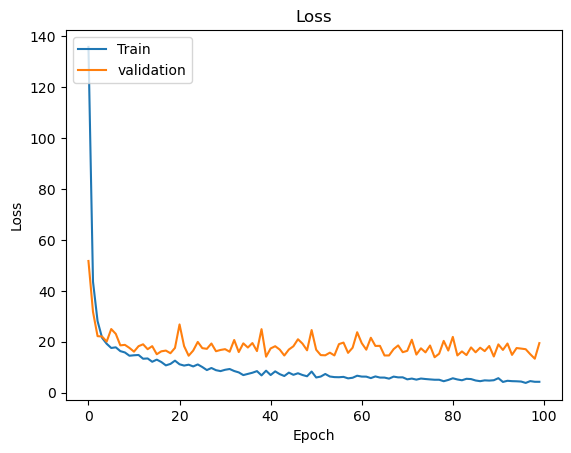

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.show()